In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport lab3

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]

# Detecting peaks

In [198]:
x, sr = librosa.load("3length.wav")

In [199]:
time, envelope = lab3.get_time_envelope(x, sr)
len(time), len(envelope)

(1029, 1029)

(0, 9.220744085311889)

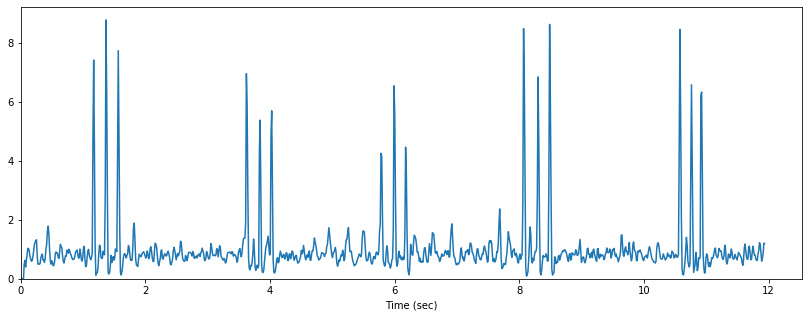

In [200]:
plt.figure(figsize=(14, 5))
plt.plot(time, envelope)
plt.xlabel('Time (sec)')
plt.xlim(xmin=0)
plt.ylim(0)

In [201]:
peaks = librosa.util.peak_pick(envelope, 7, 7, 7, 7, 2, 1)
len(peaks)

15

Text(0.5, 0, 'Time (sec)')

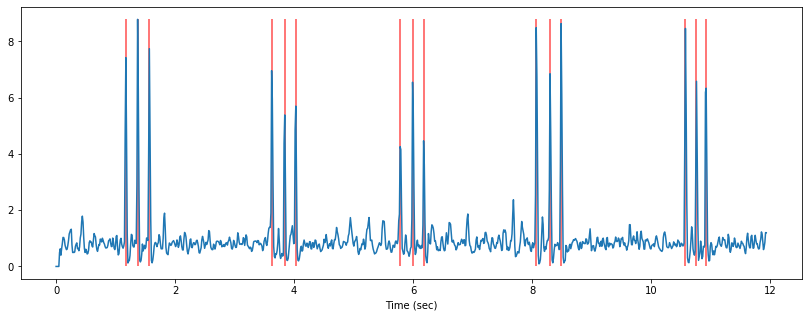

In [202]:
plt.figure(figsize=(14, 5))
plt.plot(time, envelope)
plt.grid(False)
plt.vlines(time[peaks], 0, max(envelope), color='r', alpha=0.7)
plt.xlabel('Time (sec)')
# plt.xlim(0, T)
# plt.ylim(0)

# Feature extration

In [203]:
peaks = time[peaks]
peaks

array([ 1.17260771,  1.36997732,  1.56734694,  3.62231293,  3.84290249,
        4.02866213,  5.78176871,  5.9907483 ,  6.17650794,  8.06893424,
        8.30113379,  8.48689342, 10.57668934, 10.76244898, 10.92498866])

In [204]:
keys = np.array(np.split(peaks, 5))
keys

array([[ 1.17260771,  1.36997732,  1.56734694],
       [ 3.62231293,  3.84290249,  4.02866213],
       [ 5.78176871,  5.9907483 ,  6.17650794],
       [ 8.06893424,  8.30113379,  8.48689342],
       [10.57668934, 10.76244898, 10.92498866]])

Extracting 2 features:
    #time of knocking
    #intervals between knocks

## Time of knocking

In [205]:
time = np.ptp(keys, axis=1)
time_E = time.mean()
time_D = time.std()
print(f'{time}\nE={time_E}, D={time_D}')

[0.39473923 0.40634921 0.39473923 0.41795918 0.34829932]
E=0.3924172335600907, D=0.023679800371514702


So we consider only sequences with time of knocking $0.3924 \pm 0.0237$

## Intervals

In [206]:
intervals = (keys - np.min(keys, axis=1).reshape((5,1)))/\
            (np.ptp(keys, axis=1).reshape((5, 1)))
intervals

array([[0.        , 0.5       , 1.        ],
       [0.        , 0.54285714, 1.        ],
       [0.        , 0.52941176, 1.        ],
       [0.        , 0.55555556, 1.        ],
       [0.        , 0.53333333, 1.        ]])

In [207]:
intervals_E = intervals.transpose().mean(axis=1)
intervals_E

array([0.        , 0.53223156, 1.        ])

# Spoting the key knocking

In [236]:
import  scipy.stats as scp

In [211]:
x, sr = librosa.load("3length_with_noize.wav")
time, envelope = lab3.get_time_envelope(x, sr)
peaks = librosa.util.peak_pick(envelope, 7, 7, 7, 7, 2, 10)

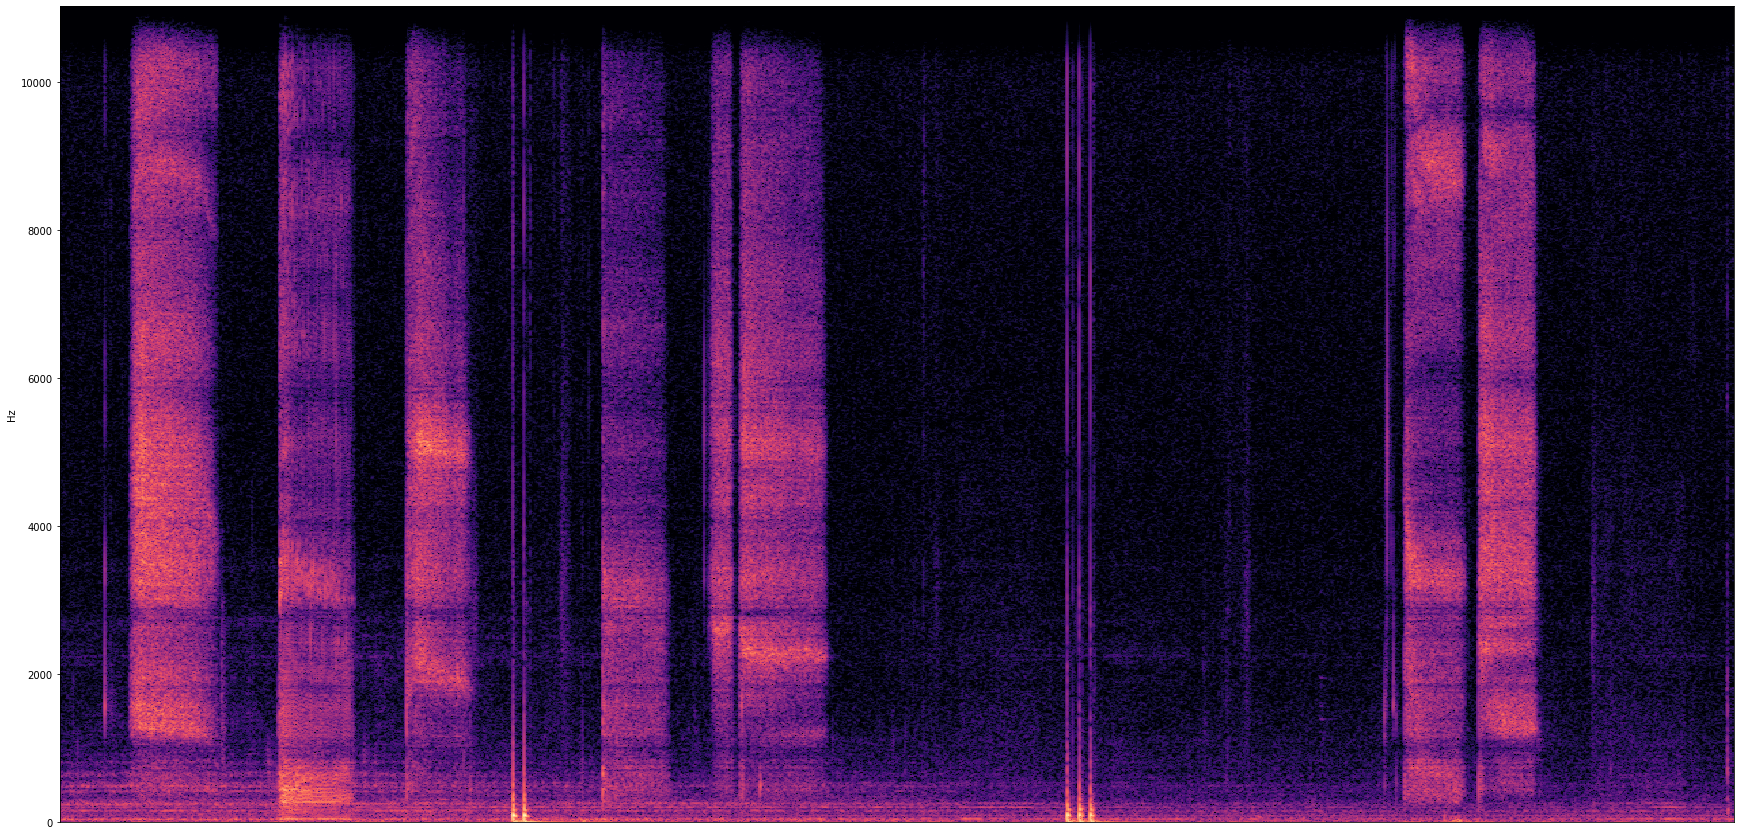

In [246]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
librosa.display.specshow(D, y_axis='linear');

Text(0.5, 0, 'Time (sec)')

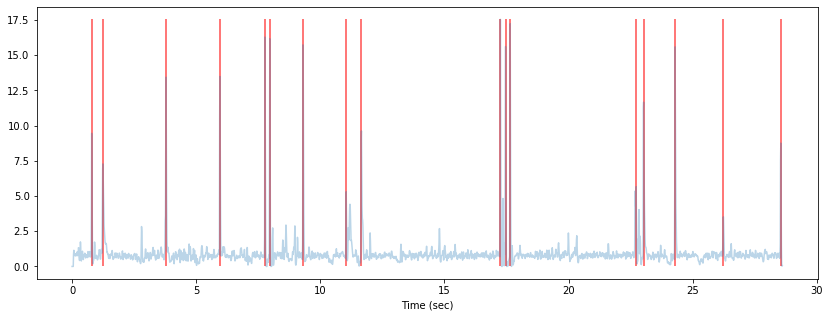

In [222]:
plt.figure(figsize=(14, 5))
plt.plot(time, envelope, alpha=0.3)
plt.grid(False)
plt.vlines(time[peaks], 0, max(envelope), color='r', alpha=0.7)
plt.xlabel('Time (sec)')

In [223]:
seq = lab3.get_seq(time[peaks], 3)

In [243]:
accepted = []
for s in seq:
    if  time_E - time_D <= s.ptp() <= time_E + time_D:
        tmp = (s - np.min(s))/s.ptp()
        corr, p = scp.spearmanr(intervals_E, tmp)
        if corr > 0.95:
            accepted.append(s)
accepted

[array([17.25565369, 17.46467238, 17.65046677])]

Text(0.5, 0, 'Time (sec)')

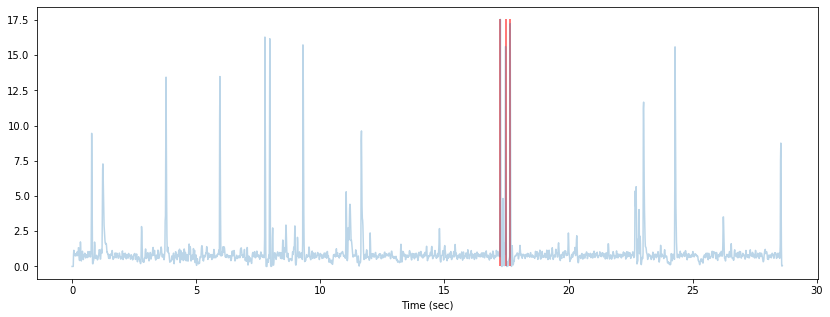

In [244]:
plt.figure(figsize=(14, 5))
plt.plot(time, envelope, alpha=0.3)
plt.grid(False)
plt.vlines(accepted[0], 0, max(envelope), color='r', alpha=0.7)
plt.xlabel('Time (sec)')